[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W3/W3P0.ipynb)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

### To reach the datasets, you need to run the following functions

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")


def to_dataframe(text: str):  ### this dude will convert *.txt file to a dataframe
    """
    
    Parameters
    ----------
    text : this dude is a text file.

    Returns
    -------
    Panda dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    L = L.apply(pd.to_numeric)
    L.columns = headers
    print("Data was parsed succesfully!")
    return L
  

In [ ]:
download_data()
os.listdir()   ### make sure that you are at the right directory

--2022-10-15 12:47:47--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip.1’

ch2data.zip.1       100%[===================>] 544.32K   195KB/s    in 2.8s    

2022-10-15 12:47:50 (195 KB/s) - ‘ch2data.zip.1’ saved [557379/557379]

Archive:  /content/ch2data.zip
replace /content/ch2data/d-aapl0305.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/

['d-ibm3dx7008.txt',
 'q-gnp4710.txt',
 'q-gdp4708.txt',
 'w-gs1yr.txt',
 'm-baa-1911.txt',
 'm-3m4608.txt',
 'm-ibm3dx2608.txt',
 'm-aaa-1911.txt',
 'm-unrate-4811.txt',
 'd-vix0810.txt',
 'w-gs3yr.txt',
 'w-tb6ms.txt',
 'd-sp55008.txt',
 'd-aapl0305.txt',
 'm-dec125910-6111.txt',
 'w-tb3ms.txt',
 'q-GNPC96.txt',
 'm-ibm3dx2609.txt',
 'q-ko-earns8309.txt',
 'q-jnj-earns-9211.txt',
 'q-gdpc96.txt',
 'm-ibmsp6709.txt',
 'm-deciles08.txt',
 'm-dec12910.txt']

###Run the next cell to reach the dataset

In [ ]:
try:
    data = to_dataframe("m-dec12910.txt") 
except Exception:
    print("Something is wrong with directories")

Data was parsed succesfully!


In [ ]:
data

,date,dec1,dec2,dec9,dec10
0,19670131,0.068568,0.080373,0.180843,0.211806
1,19670228,0.008735,0.011044,0.048767,0.064911
2,19670331,0.039698,0.035364,0.067494,0.068904
3,19670428,0.044030,0.037541,0.040785,0.044602
4,19670531,-0.050631,-0.036233,-0.002191,0.000295
...,...,...,...,...,...
511,20090831,0.029726,0.035835,0.044097,0.081239
512,20090930,0.031177,0.049051,0.074140,0.069305
513,20091030,-0.012101,-0.038530,-0.080076,-0.074620
514,20091130,0.063006,0.051560,0.014429,0.010572


In [ ]:
data = data["dec10"]

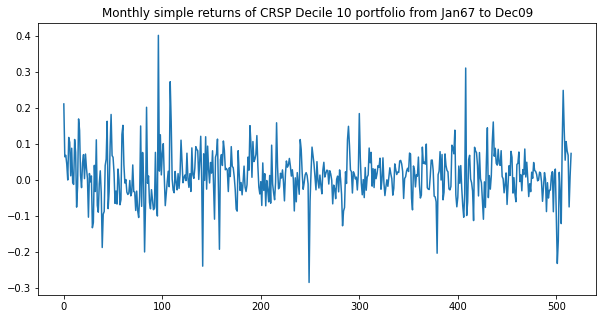

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Monthly simple returns of CRSP Decile 10 portfolio from Jan67 to Dec09")
plt.plot(data)  ### sketching the thing!
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

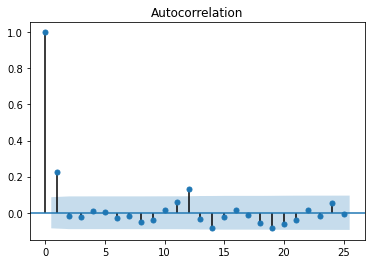

In [ ]:
plot_acf(data, lags = 25, alpha = 0.05);

###What do you thing about ACF of this time series? Lag-1 ACF is large how about the others?  For instance 12?
---
### Let's see!

In [ ]:
from statsmodels.tsa.stattools import acf
acf_array = acf(data, nlags = 12)
def t_ratio(acf_array,T):
    num = acf_array[-1]
    squared_sum = np.sum(np.square(acf_array[:-1]))
    return num/np.sqrt((1+2*squared_sum)/T)

In [ ]:
acf_array = acf(data, nlags = 12)

In [ ]:
T = len(data)  ### T here refers to the length of your time series.

In [ ]:
x = t_ratio(acf_array, T)
print(x)

1.676260154262774


In [ ]:
import scipy
scipy.stats.norm.sf(abs(x))   ### we reject the null hypothesis!, we have enough evidence to refute nulll hyp.

0.046843623021216654

---
### Please go back to slides! (then come back)
### Portmanteau Test and Ljung and Box test
---

In [ ]:
try:
    data = to_dataframe("m-ibmsp6709.txt") 
except Exception:
    print("Something is wrong with directories")

In [ ]:
data

,date,ibm,sp
0,19670131,0.075370,0.078178
1,19670228,0.079099,0.001963
2,19670331,0.048837,0.039410
3,19670428,0.100887,0.042239
4,19670531,-0.035234,-0.052441
...,...,...,...
511,20090831,0.005681,0.033560
512,20090930,0.013215,0.035723
513,20091030,0.008361,-0.019762
514,20091130,0.052152,0.057364


0      0.075370
1      0.079099
2      0.048837
3      0.100887
4     -0.035234
         ...   
511    0.005681
512    0.013215
513    0.008361
514    0.052152
515    0.036011
Name: ibm, Length: 516, dtype: float64


Text(0.5, 1.0, 'Simple returns of IBM stock')

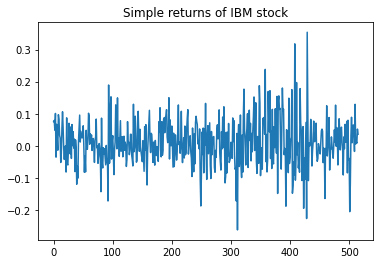

In [ ]:
data_plain = data["ibm"]
print(data_plain)
plt.plot(data_plain)
plt.title("Simple returns of IBM stock")

In [ ]:
log_ = lambda x: np.log(x+1)
data_log = data_plain.apply(log_) 

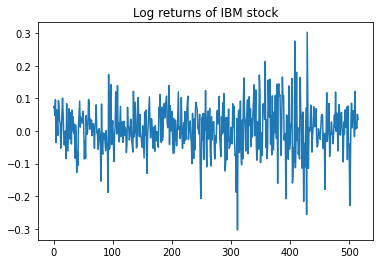

In [ ]:
plt.plot(data_log)
plt.title("Log returns of IBM stock")
plt.show()

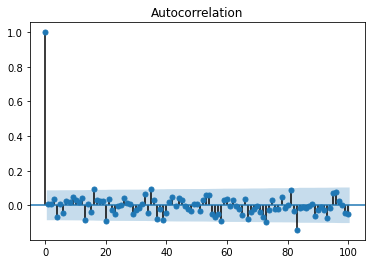

In [ ]:
plot_acf(data_log, lags = 100, alpha = 0.05);

In [ ]:
acf(data_log, nlags = 12, fft = True)

array([ 1.        ,  0.006787  ,  0.00838387,  0.03803315, -0.06644441,
        0.0102319 , -0.04523879,  0.0262115 ,  0.01624549,  0.04552197,
        0.03327258,  0.01655037,  0.03970522])

In [ ]:
import statsmodels
acf_ = acf(data_log, nlags = 12, fft = True, )[1:]
statsmodels.tsa.stattools.q_stat(acf_, nobs = 516)

(array([0.02390717, 0.06045866, 0.81413827, 3.11890184, 3.17366284,
        4.24624678, 4.60702931, 4.74589072, 5.83837111, 6.42316384,
        6.56814235, 7.40421524]),
 array([0.87712135, 0.97022301, 0.84608244, 0.53812835, 0.67323223,
        0.64339134, 0.70779376, 0.78435827, 0.75597951, 0.77854688,
        0.83290115, 0.82978707]))

In [ ]:
def Q(acf: np.array, T: int):  ### we can code it on our own without bothering ourselves (but not preferred!)
  t = 0
  for i, p in enumerate(acf):
    if i == 0:
      continue
    else:
      t += p**2/(T-(i+1))
  return T*(T+2)*t

In [ ]:
Q(acf_, 516) ### This dude is our Q value!

7.380308069995906

In [ ]:
acf(data_plain, nlags = 24, fft = True, qstat= True)  #### we can get these value directly as well.

(array([ 1.00000000e+00,  2.91522637e-03, -6.12050308e-04,  3.34879598e-02,
        -7.10782787e-02,  1.00419477e-02, -3.92222768e-02,  2.53916954e-02,
         1.57365270e-02,  4.58473643e-02,  3.91330974e-02,  1.65199754e-02,
         4.23428140e-02, -9.04386473e-02,  3.02744228e-03, -3.19762760e-02,
         9.30674933e-02,  3.65123763e-02,  1.85538117e-02,  2.55507795e-02,
        -8.77363203e-02,  4.52275566e-02, -2.39226635e-02, -5.39404433e-02,
        -2.54926192e-03]),
 array([4.41079424e-03, 4.60559497e-03, 5.88910425e-01, 3.22635478e+00,
        3.27910137e+00, 4.08536095e+00, 4.42392830e+00, 4.55422504e+00,
        5.66237937e+00, 6.47132138e+00, 6.61576783e+00, 7.56660984e+00,
        1.19129088e+01, 1.19177888e+01, 1.24632923e+01, 1.70935535e+01,
        1.78076536e+01, 1.79924172e+01, 1.83435177e+01, 2.24916883e+01,
        2.35962260e+01, 2.39058763e+01, 2.54833480e+01, 2.54868785e+01]),
 array([0.94704838, 0.99769985, 0.89896632, 0.52068474, 0.65704274,
        0.66512

# End of the notebook!